<a href="https://colab.research.google.com/github/fatjan/learn-tensorflow/blob/master/NLP_with_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [2]:
embedding_layer = layers.Embedding(1000, 5)

result = embedding_layer(tf.constant([1,2,3]))

print(result.numpy())
print(result.numpy().shape)


[[-0.00238254  0.02834767  0.04724394 -0.02584418  0.00557625]
 [-0.03585221 -0.00185205 -0.00499124 -0.0361088  -0.00053399]
 [ 0.01845406  0.04280822 -0.01785996 -0.0011384   0.0127807 ]]
(3, 5)


Download the dataset

In [3]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',
                                          split=(tfds.Split.TRAIN, tfds.Split.TEST),
                                          with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMC7NYM/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMC7NYM/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMC7NYM/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
encoder = info.features['text'].encoder
print(encoder.subwords[:20])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_']


Add padding to ensure that each has the same length.

In [5]:
padded_shapes = ([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, 
                                                      padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10,
                                                    padded_shapes=padded_shapes)

Create the model

In [6]:
embedding_dim = 16
output_dim = 11
model = keras.Sequential([
                          layers.Embedding(encoder.vocab_size, embedding_dim),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(train_batches, epochs=10, validation_data=test_batches,
                    validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6292 - accuracy: 0.7077 - val_loss: 0.5111 - val_accuracy: 0.8100
Epoch 2/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.4537 - accuracy: 0.8419 - val_loss: 0.4010 - val_accuracy: 0.8850
Epoch 3/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.3542 - accuracy: 0.8807 - val_loss: 0.3893 - val_accuracy: 0.8750
Epoch 4/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.3008 - accuracy: 0.8968 - val_loss: 0.3364 - val_accuracy: 0.8800
Epoch 5/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2692 - accuracy: 0.9102 - val_loss: 0.3037 - val_accuracy: 0.8900
Epoch 6/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2445 - accuracy: 0.9176 - val_loss: 0.3799 - val_accuracy: 0.8700
Epoch 7/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2254 - accuracy: 0.9240 - val_loss: 0.3021 - val_ac

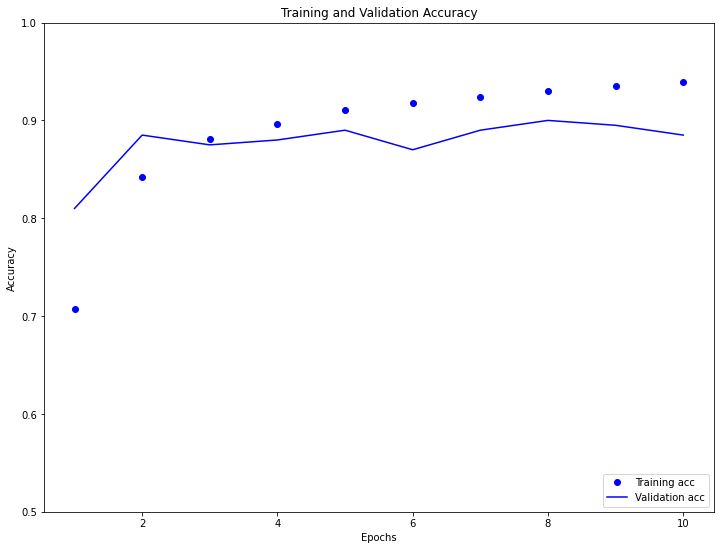

In [8]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim(0.5, 1)
plt.show()